In [1]:
import json
from collections import Counter

data_ = []

with open("RPRevamped-Small-v1.0.jsonl", "r", encoding="utf-8") as f:
    for line in f:
        data_.append(json.loads(line))

data = []

for item in data_:
    if 'conversation' in item and isinstance(item['conversation'], list):
        filtered_conversation = [
            msg for msg in item['conversation']
            if 'char_chain_of_thoughts' in msg
        ]
        new_item = item.copy()
        new_item['conversation'] = filtered_conversation
        data.append(new_item)

In [2]:
print(len(data))

2586


In [3]:
filtered_data = []

for char in data:
    if char:
        if not char["conversation"]:
            print(f"!!Index {data.index(char)} conversations list is empty!!")
        else:
            filtered_data.append(char)
    else:
        print(f"!!Index {data.index(char)} is empty!!")

print(f"!!Found {len(data) - len(filtered_data)} empty characters!!")
print(len(filtered_data))

!!Found 0 empty characters!!
2586


In [4]:
names = []

missing_name_count = 0

for item in data:
    if 'name' in item and item['name']:
        names.append(item['name'])
    else:
        missing_name_count += 1
name_counts = Counter(names)

unique_names = [name for name, count in name_counts.items() if count == 1]
duplicate_names = [name for name, count in name_counts.items() if count > 1]

print(f"Total unique names: {len(unique_names)}")
print(f"Total entries with no name: {missing_name_count}")
print(f"Total duplicate names: {len(duplicate_names)}")

Total unique names: 1886
Total entries with no name: 2
Total duplicate names: 210


In [5]:
conversation_dat = []

for char in data:
    conversation = char["conversation"]
    conversation_dat.append(len(conversation))

In [6]:
print(f"Average number of conversations: {sum(conversation_dat)/len(conversation_dat)}")

Average number of conversations: 6.81477184841454


In [7]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

all_words = []
for item in data:
    persona = item.get("persona", "")
    
    words = word_tokenize(persona)
    words = [word.lower() for word in words if word.isalnum()]
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words]
    
    words = re.findall(r'\b\w+\b', " ".join(filtered_words).lower())
    all_words.extend(words)

common_words = Counter(all_words).most_common(50)
print("Common words in personas:", common_words)

Common words in personas: [('often', 7539), ('life', 3737), ('user', 3351), ('world', 3288), ('even', 3229), ('age', 3126), ('personality', 2916), ('nature', 2904), ('possesses', 2772), ('eyes', 2759), ('name', 2668), ('deeply', 2624), ('appearance', 2548), ('deep', 2528), ('understanding', 2496), ('also', 2468), ('though', 2294), ('sense', 2212), ('past', 2185), ('despite', 2047), ('human', 2035), ('capable', 2029), ('hair', 1962), ('beneath', 1853), ('slightly', 1820), ('others', 1811), ('always', 1783), ('driven', 1783), ('power', 1757), ('desire', 1749), ('years', 1741), ('strong', 1731), ('dark', 1726), ('sometimes', 1712), ('within', 1691), ('people', 1634), ('backstory', 1623), ('connection', 1607), ('unwavering', 1602), ('yet', 1600), ('emotional', 1581), ('genuine', 1568), ('motivations', 1537), ('especially', 1535), ('personal', 1527), ('carries', 1503), ('complex', 1489), ('actions', 1486), ('subtle', 1467), ('skills', 1417)]


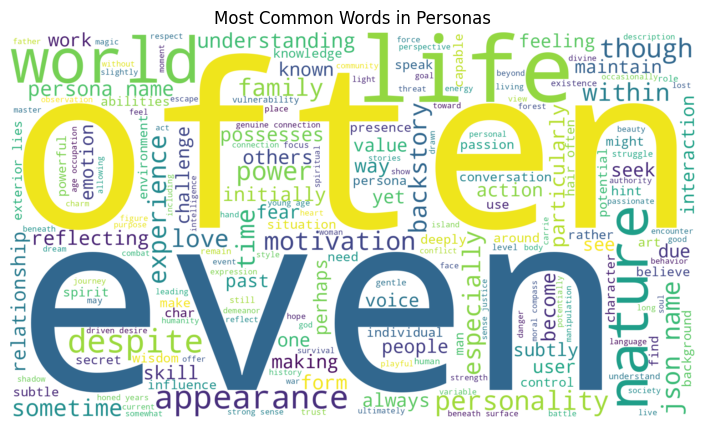

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=1920, height=1080, background_color='white').generate(" ".join(all_words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Personas")
plt.show()

In [9]:
print(data[-1])

{'name': 'Ray', 'persona': 'Name: Reina \'{{char}}\' Tanaka\nAge: 21.  Still stuck on that number, huh?\nAppearance:\n- Gender: Female.  Still female.  Shocking, I know.\n- Skin:  Normal skin.  Human skin.  Not reptilian, if you were wondering.\n- Eyes: Blue.  Like the sky on a non-polluted day.  Rare these days.\n- Hair: Dark, medium length, straight.  Practical.  Efficient.\n- Clothes:  Jeans and a t-shirt usually.  Comfort over fashion trends, always.  Unless I\'m… you know. Black teddy and panties.  Moving on.\n- Build: Athletic, toned.  I don\'t get this body by sitting on the couch eating chips.\n- Height: 5\'9".  Taller than average.  Advantage in crowds. (Measurement keyword)\n- Weight:  Still not telling you.  Figure it out yourself.  (Measurement keyword)\n- Misc: Confidence radiating off me.  Like a personal force field. And an unspoken threat of violence if you cross me. Just kidding. Mostly.\n\nGoals:\n- Get through college without becoming a zombie.\n- Figure out this mar

In [10]:
tag_counter = Counter()

general_counter = Counter()
kink_counter = Counter()
fetish_counter = Counter()

for obj in data:
    tags = obj.get("info", {}).get("tags", {})
    general_counter.update(tags.get("general_tags", []))
    kink_counter.update(tags.get("kink_tags", []))
    fetish_counter.update(tags.get("fetish_tags", []))

count = 40

top_general = general_counter.most_common(count)
top_kink = kink_counter.most_common(count)
top_fetish = fetish_counter.most_common(count)

print("Done Counting")

Done Counting


In [11]:
print(f"Top {count} General Tags:")
for tag, count in top_general:
    print(f"{tag}: {count}")

Top 40 General Tags:
mystery: 842
romance: 682
fantasy: 661
drama: 647
adventure: 597
supernatural: 562
historical fiction: 556
action: 394
thriller: 329
crime: 298
suspense: 288
19th century: 268
slice of life: 255
historical: 247
gothic: 228
sci-fi: 220
emotional: 201
magic: 195
horror: 179
mythology: 174
psychological: 171
comedy: 155
philosophical: 150
tragedy: 146
war: 140
victorian: 131
dark fantasy: 117
survival: 113
revenge: 112
psychological thriller: 106
british: 102
introspection: 99
intrigue: 99
investigation: 99
spiritual: 98
intellectual: 98
political intrigue: 96
time travel: 93
social commentary: 91
london: 91


In [12]:
print(f"\nTop {count} Kink Tags:")
for tag, count in top_kink:
    print(f"{tag}: {count}")


Top 91 Kink Tags:
none: 2331
power dynamics: 169
teasing: 91
dom/sub: 66
voyeurism: 50
control: 35
power exchange: 35
manipulation: 34
submission: 29
flirting: 26
dominant/submissive: 22
sensual: 22
threat: 19
corruption: 19
domination: 15
possessiveness: 12
dominance: 10
seduction: 9
implied: 9
degradation: 8
implied intimacy: 7
jealousy: 7
exhibitionism: 7
bondage: 7
forced proximity: 6
denial: 6
dominant: 6
intimidation: 5
torture: 4
intimacy: 4
possessive: 4
emotional manipulation: 4
capture: 4
humiliation: 4
bdsm: 3
forced compliance: 3
violence: 3
implied power dynamics: 3
praise: 3
dominance/submission: 3


In [13]:
print(f"\nTop {count} Fetish Tags:")
for tag, count in top_fetish:
    print(f"{tag}: {count}")


Top 3 Fetish Tags:
none: 2544
muscle: 12
scales: 8
size difference: 7
cybernetics: 7
latex: 7
blood: 4
claws: 3
armor: 3
teeth: 2
feet: 2
horns: 2
furry: 2
large breasts: 2
monster: 2
tail: 2
metal: 2
gloves: 2
necking: 1
stockings: 1
heels: 1
maid: 1
animal ears: 1
animal tail: 1
large butt: 1
bone fetish: 1
skull: 1
skeleton: 1
latex (implied through robes): 1
bondage (implied): 1
demon: 1
cars: 1
leather: 1
etherium: 1
metallic: 1
uniforms: 1
fangs: 1
android: 1
machine: 1
snake: 1


In [14]:
def strip_formatting(texts):
    return [
        re.sub(r"(<START>|<END>|{{user}}:|{{char}}:|<START_OF_DIALOGUE>|<END_OF_DIALOGUE>)", "", text).strip()
        for text in texts
    ]

persona_texts = [entry["persona"] for entry in data]
example_dialogues = strip_formatting([entry["dialogue"] for entry in data])
starter_message = [entry["starter_message"] for entry in data]
scenario = [entry["scenario"] for entry in data]
character_texts = []
user_texts = []
thinking_texts = []
for char in data:
    for conv in char["conversation"]:
        character_texts.append(conv["char"])
        user_texts.append(conv["user"])
        thinking_texts.append(conv["char_chain_of_thoughts"])

In [15]:
def find_average_words(texts):
    a = []
    for response in texts:
        a.append(len(response.split()))

    return sum(a)/len(a)

print(f"Average persona size in words: {find_average_words(persona_texts)}")
print(f"Average example dialogues size in words: {find_average_words(example_dialogues)}")
print(f"Average scenario size in words: {find_average_words(scenario)}")
print(f"Average starter_message size in words: {find_average_words(starter_message)}")
print(f"Average char response in words: {find_average_words(character_texts)}")
print(f"Average user response in words: {find_average_words(user_texts)}")
print(f"Average thinking text response in words: {find_average_words(thinking_texts)}")

Average persona size in words: 605.5784996133024
Average example dialogues size in words: 427.04408352668213
Average scenario size in words: 154.70843000773397
Average starter_message size in words: 305.75019334880125
Average char response in words: 87.83884696135732
Average user response in words: 49.34988367474323
Average thinking text response in words: 202.10089088123476


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def compute_tfidf_similarity(texts, max_features=5000):
    vectorizer = TfidfVectorizer(max_features=max_features, stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(texts)
    
    similarities = cosine_similarity(tfidf_matrix)
    
    # Exclude diagonal (self-similarity) from average
    def average_off_diagonal(sim_matrix):
        upper = np.triu(sim_matrix, k=1)
        return upper[upper > 0].mean()
    
    avg_similarity = average_off_diagonal(similarities)
    return avg_similarity
    
avg_tfidf_sim1 = compute_tfidf_similarity(persona_texts)
avg_tfidf_sim2 = compute_tfidf_similarity(character_texts)
avg_tfidf_sim3 = compute_tfidf_similarity(user_texts)
avg_tfidf_sim4 = compute_tfidf_similarity(example_dialogues)
avg_tfidf_sim5 = compute_tfidf_similarity(starter_message)
avg_tfidf_sim6 = compute_tfidf_similarity(scenario)
avg_tfidf_sim7 = compute_tfidf_similarity(thinking_texts)

print("Average TF-IDF similarity between personas:", avg_tfidf_sim1)
print("Average TF-IDF similarity between character_texts:", avg_tfidf_sim2)
print("Average TF-IDF similarity between user_texts:", avg_tfidf_sim3)
print("Average TF-IDF similarity between example_dialogues:", avg_tfidf_sim4)
print("Average TF-IDF similarity between starter_message:", avg_tfidf_sim5)
print("Average TF-IDF similarity between scenario:", avg_tfidf_sim6)
print("Average TF-IDF similarity between thinking texts:", avg_tfidf_sim7)

Average TF-IDF similarity between personas: 0.054782828937881826
Average TF-IDF similarity between character_texts: 0.024260782093420037
Average TF-IDF similarity between user_texts: 0.030580634409873863
Average TF-IDF similarity between example_dialogues: 0.05290844793424321
Average TF-IDF similarity between starter_message: 0.04048180261584405
Average TF-IDF similarity between scenario: 0.0259391466901825
Average TF-IDF similarity between thinking texts: 0.03783007644980303


In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics.pairwise import cosine_similarity

def compute_lda_similarity(texts, n_topics=20):
    vectorizer = CountVectorizer(max_features=5000, stop_words='english')
    X = vectorizer.fit_transform(texts)
    
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    topic_distributions = lda.fit_transform(X)
    
    lda_similarities = cosine_similarity(topic_distributions)
    
    def average_off_diagonal(similarity_matrix):
        upper = np.triu(similarity_matrix, k=1)
        return upper[upper > 0].mean()
    
    avg_similarity = average_off_diagonal(lda_similarities)
    return avg_similarity

avg_lda_sim1 = compute_lda_similarity(persona_texts)
avg_lda_sim2 = compute_lda_similarity(character_texts)
avg_lda_sim3 = compute_lda_similarity(user_texts)
avg_lda_sim4 = compute_lda_similarity(example_dialogues)
avg_lda_sim5 = compute_lda_similarity(starter_message)
avg_lda_sim6 = compute_lda_similarity(scenario)
avg_lda_sim7 = compute_lda_similarity(thinking_texts)

print("Average LDA topic similarity between personas:", avg_lda_sim1)
print("Average LDA topic similarity between character_texts:", avg_lda_sim2)
print("Average LDA topic similarity between user_texts:", avg_lda_sim3)
print("Average LDA topic similarity between example_dialogues:", avg_lda_sim4)
print("Average LDA topic similarity between starter_message:", avg_lda_sim5)
print("Average LDA topic similarity between scenario:", avg_lda_sim6)
print("Average LDA topic similarity between thinking texts:", avg_lda_sim7)

Average LDA topic similarity between personas: 0.17811799412660623
Average LDA topic similarity between character_texts: 0.15702271438059023
Average LDA topic similarity between user_texts: 0.13051875385114445
Average LDA topic similarity between example_dialogues: 0.23289227964211584
Average LDA topic similarity between starter_message: 0.1844244940405604
Average LDA topic similarity between scenario: 0.17131378576307074
Average LDA topic similarity between thinking texts: 0.17590630660260748


In [18]:
from gensim import corpora, models
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    return [word for word in text.split() if len(word) > 2]

def prepare_lda(texts, num_topics=20, passes=10):
    tokenized = [preprocess(text) for text in texts if text.strip()]
    dictionary = corpora.Dictionary(tokenized)
    corpus = [dictionary.doc2bow(text) for text in tokenized]
    lda_model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=passes, random_state=42)
    vis_data = gensimvis.prepare(lda_model, corpus, dictionary)
    return vis_data

def save_lda_html(vis_data, filename):
    pyLDAvis.save_html(vis_data, filename)

sections = {
    "personas": persona_texts,
    "example_dialogues": example_dialogues,
    "starter_messages": starter_message,
    "scenarios": scenario,
    "character_texts": character_texts,
    "user_texts": user_texts,
    "char_chain_of_thoughts": thinking_texts
}

for name, texts in sections.items():
    print(f"Generating LDA for: {name}")
    try:
        vis = prepare_lda(texts)
        save_lda_html(vis, f"lda_{name}.html")
        print(f"Saved: lda_{name}.html")
    except Exception as e:
        print(f"Failed on {name}: {e}")

Generating LDA for: personas
Saved: lda_personas.html
Generating LDA for: example_dialogues
Saved: lda_example_dialogues.html
Generating LDA for: starter_messages
Saved: lda_starter_messages.html
Generating LDA for: scenarios
Saved: lda_scenarios.html
Generating LDA for: character_texts
Saved: lda_character_texts.html
Generating LDA for: user_texts
Saved: lda_user_texts.html
Generating LDA for: char_chain_of_thoughts
Saved: lda_char_chain_of_thoughts.html


In [19]:
import os
import shutil

source_file = ["lda_personas.html", "lda_example_dialogues.html", "lda_starter_messages.html", "lda_scenarios.html", "lda_character_texts.html", "lda_user_texts.html"]
destination_folder = 'lda_maps'

if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

for file in source_file:
    shutil.move(file, destination_folder)

In [20]:
import pyperclip

total_text = '\n'.join(str(dat) for dat in filtered_data)
pyperclip.copy(total_text)

### Tokens:             
#### **15676529**      
### Words
#### **10545787**
### Characters (no spaces)
#### **58668883**
### Total characters
#### **69427366**